<a href="https://colab.research.google.com/github/turtlenoise/hacking_the_kidney/blob/main/hacking_the_kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
!ls /content/gdrive/MyDrive/kidney

masks  train


In [5]:
import os
from PIL import Image
import operator

In [7]:
# returns a list containing (i,j) coordinates of pixels where glomerulis are found.
def locateGlomeruliPixels(fullPath):
	glomeruliPixels = []

	image = Image.open(fullPath)
	pixelAccess = image.load()

	processedMask = Image.new(image.mode, image.size)
	processedMaskPixels = processedMask.load()
	for i in range(processedMask.size[0]):
	    for j in range(processedMask.size[1]):        
	        if (pixelAccess[i,j] == 1):
	        	processedMaskPixels[i,j] = 256
	        	glomeruliPixels.append((i,j))
	        else:
	        	processedMaskPixels[i,j] = 0        	
	return glomeruliPixels

In [20]:
def visualiseHighlightedGlomeruli(fullPath, glomeruliPixels):
	image = Image.open(fullPath)
	pixelAccess = image.load()

	processedImage = Image.new(image.mode, image.size)
	processedImagePixels = processedImage.load()
	for i in range(processedImage.size[0]):
	    for j in range(processedImage.size[1]):        
	        if ((i,j) not in glomeruliPixels):
	        	# print(pixelAccess[i,j])
	        	processedImagePixels[i,j] = tuple(map(operator.add, pixelAccess[i,j], (80,80,80)))
	        else:
	        	processedImagePixels[i,j] = pixelAccess[i,j]

	return processedImage

/content/gdrive/MyDrive/kidney/masks/b2dc8411c_0191.png


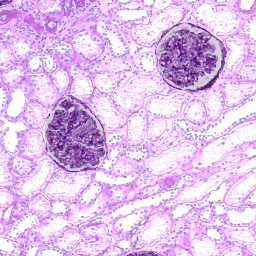

In [22]:
maskDirectoryPath = '/content/gdrive/MyDrive/kidney/masks/'
imageDirectoryPath = '/content/gdrive/MyDrive/kidney/train/'
maskImageName = os.listdir(maskDirectoryPath)[20]
fullPath = maskDirectoryPath + maskImageName
print(fullPath) 
glomeruliPixels = locateGlomeruliPixels(fullPath)
fullPath = imageDirectoryPath + maskImageName
processedImage = visualiseHighlightedGlomeruli(fullPath, glomeruliPixels)
processedImage